Focus on sensitivity for increasing p on both MSE and number of iterations

In [4]:
import problems
from experiments import *
import os

wd = os.getcwd()

%cd -q ..
%cd -q ..
from fastridge import RidgeEM, RidgeLOOCV

%cd -q $wd

In [2]:
ps = [50, 100]
probs = [problems.random_problem(p) for p in ps]
ns = [50, 75, 100, 150, 200, 300, 400, 600, 800, 1200, 1600]

ridgeEM = RidgeEM(fit_intercept=False)
ridgeCV_GLM = RidgeLOOCV(alphas=100, fit_intercept=False)
ridgeCV_fixed = RidgeLOOCV(alphas=np.logspace(-10, 10, 100, endpoint=True, base=10), fit_intercept=False)

estimators = [ridgeEM, ridgeCV_fixed, ridgeCV_GLM]
est_names = ['EM', 'CV_fix', 'CV_glm']

exp1 = Experiment(probs, estimators, ns, 100, est_names)
exp1.run()

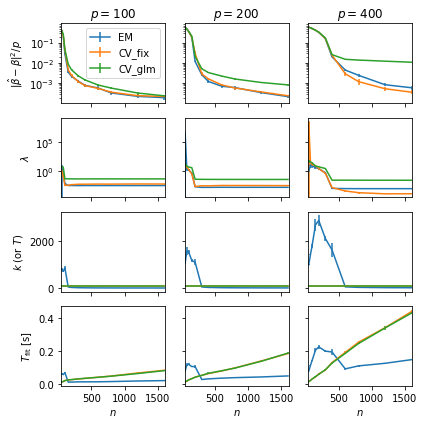

In [38]:
from importlib import reload
import plotting
reload(plotting)
from plotting import plot_metrics
from matplotlib import pyplot as plt

prob_idx=[1, 2, 3]
fig, axs = plot_metrics(exp1, [parameter_mean_squared_error, regularization_parameter, number_of_iterations, fitting_time], prob_idx=prob_idx, figsize=(6, 6))
axs[0, 0].set_yscale('log')
axs[1, 0].set_yscale('log')
axs[2, 0].set_ylabel('$k$ (or $T$)')
for i in range(len(prob_idx)):
    axs[0, i].set_title(f'$p={ps[prob_idx[i]]}$')
axs[0, 0].legend()
#plt.savefig('growing_p.pdf', dpi=600, bbox_inches="tight")
plt.show()

In [22]:
from importlib import reload
import fastridge
reload(fastridge)
from fastridge import RidgeLOOCV

test_loocv = RidgeLOOCV(alphas=100)
test_loocv.fit(*probs[0].rvs(300))


In [23]:
test_loocv.alphas_

array([4.13057506e-02, 4.53330103e-02, 4.97529228e-02, 5.46037714e-02,
       5.99275717e-02, 6.57704360e-02, 7.21829723e-02, 7.92207230e-02,
       8.69446456e-02, 9.54216413e-02, 1.04725133e-01, 1.14935705e-01,
       1.26141794e-01, 1.38440463e-01, 1.51938237e-01, 1.66752028e-01,
       1.83010145e-01, 2.00853408e-01, 2.20436368e-01, 2.41928641e-01,
       2.65516385e-01, 2.91403905e-01, 3.19815426e-01, 3.50997035e-01,
       3.85218813e-01, 4.22777171e-01, 4.63997424e-01, 5.09236600e-01,
       5.58886539e-01, 6.13377287e-01, 6.73180815e-01, 7.38815114e-01,
       8.10848675e-01, 8.89905420e-01, 9.76670100e-01, 1.07189423e+00,
       1.17640259e+00, 1.29110039e+00, 1.41698109e+00, 1.55513499e+00,
       1.70675874e+00, 1.87316561e+00, 2.05579694e+00, 2.25623461e+00,
       2.47621469e+00, 2.71764257e+00, 2.98260937e+00, 3.27341010e+00,
       3.59256354e+00, 3.94283405e+00, 4.32725550e+00, 4.74915757e+00,
       5.21219457e+00, 5.72037711e+00, 6.27810681e+00, 6.89021448e+00,
      